### Optimization Techniques in Machine Learning
Objective: 
This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis techniques used in machine learning to improve models' performance, convergence speed, and efficiency...

Project Name: Predictors-of-Student-Retention

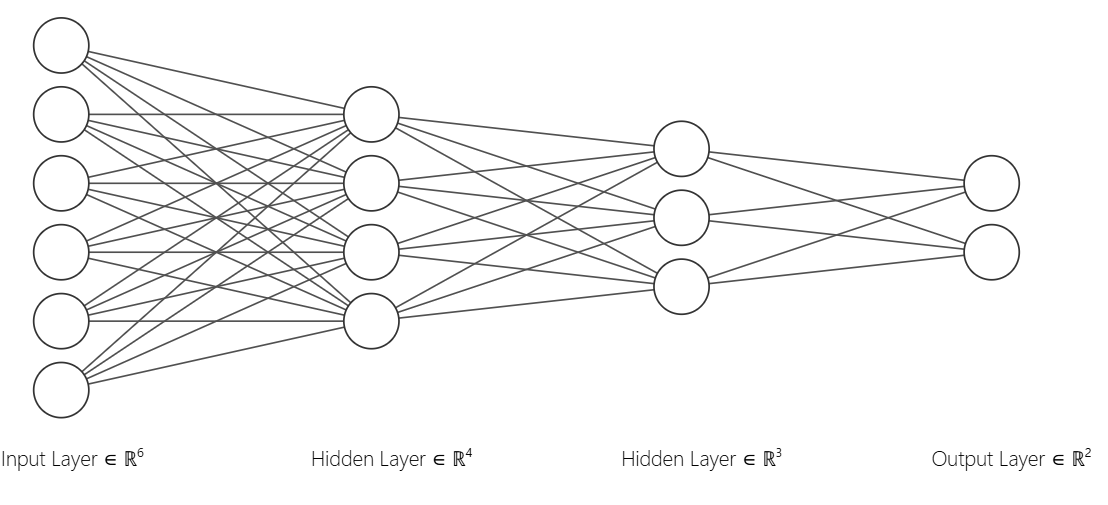

## import necessary libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Dataset
The dataset provides insights into factors influencing student dropout rates and academic success across various undergraduate programs. It includes demographic, socio-economic, and academic performance data, such as course selection, grades, and units completed. Additionally, it incorporates regional economic factors like unemployment, inflation, and GDP, helping to understand how these elements impact student outcomes in disciplines such as agronomy, design, nursing, and more.

### Step 1: Load the data

In [2]:

data = pd.read_csv('dataset.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


### Step 3: Clean the 'Target' Column

In [3]:
# Clean the 'Target' column: strip spaces and handle missing values
data['Target'] = data['Target'].astype(str).str.strip()  # Ensure string type and strip spaces
data['Target'].fillna(data['Target'].mode()[0], inplace=True)  # Fill missing values with the most frequent value

# Map 'Graduate' to 1, 'Dropout' to 0, 'Enrolled' to 2
data['Target'] = data['Target'].replace({'Graduate': 1, 'Dropout': 0, 'Enrolled': 2})

# Optionally, remove rows where 'Target' is 'Enrolled' (if needed)
# data = data[data['Target'] != 2]  # Uncomment this line to drop 'Enrolled'

# Print the first few rows to confirm changes
data.head()


C:\Users\thinkBIG\AppData\Local\Temp\ipykernel_8656\3586998277.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Target'].fillna(data['Target'].mode()[0], inplace=True)  # Fill missing values with the most frequent value
C:\Users\thinkBIG\AppData\Local\Temp\ipykernel_8656\3586998277.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Step 4: Split Features and Target

In [4]:
# Separate features and target
X = data.drop(columns=['Target'])
y = data['Target']

### Step 5: Split Data into Training, Validation, and Test Sets

In [5]:
# Split the data into training, validation, and testing sets
# 70% for training, 15% for validation, and 15% for testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the temporary set (X_temp, y_temp) into validation and test sets (50% each of the 30%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of each dataset to verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 3096
Validation set size: 664
Test set size: 664


### Step 6: Standardize the Data

In [6]:
# Step 1: Initialize the StandardScaler
scaler = StandardScaler()

# Step 2: Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Transform the validation and test data (using the same scaler)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the first few rows of the scaled training set to verify
print("Scaled Training Data (first 5 rows):")
print(X_train_scaled[:5])


Scaled Training Data (first 5 rows):
[[-0.29110653  0.21469738  2.4695107  -0.67882338  0.35816181 -0.37504799
  -0.14174832  0.08891594 -1.40625417 -0.56600713 -0.36471148  0.90500631
  -0.10537482  2.83771591 -2.73961576  1.35276817 -0.58431254  0.36749028
  -0.15430335 -0.301579   -0.50085933  0.64862305 -1.20605238 -0.13299929
  -0.19303949 -0.28474378 -0.54842352  1.5078921  -1.1528208   0.14241698
  -0.1983432  -0.99975004  0.11691871  1.53701196]
 [-0.29110653 -1.11622983  3.22672622  0.47338999  0.35816181 -0.37504799
  -0.14174832 -1.24310226 -1.40625417  0.65685266  0.42739427  0.90500631
   9.48993275  2.83771591  0.36501469  1.35276817 -0.58431254 -0.56410984
  -0.15430335  0.56535562  0.31164289 -0.06088241  0.74718468  0.503392
  -0.19303949  0.24824699  0.82270909  0.75076691  1.18759441  0.40416621
  -0.1983432   0.31056497 -0.53555936  0.78172986]
 [-0.29110653  0.21469738  0.95507965 -0.21793803  0.35816181 -0.37504799
  -0.14174832 -1.24310226 -0.22459903 -0.32143517

### Step 7: Train Random Forest Model

In [7]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Accuracy: 77.71%

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       210
           1       0.80      0.93      0.86       332
           2       0.59      0.30      0.40       122

    accuracy                           0.78       664
   macro avg       0.73      0.68      0.69       664
weighted avg       0.76      0.78      0.76       664


Confusion Matrix:
[[170  28  12]
 [  9 309  14]
 [ 35  50  37]]


### Step 9: Build and Train Basic Neural Network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
basic_nn = Sequential()

# Add layers to the model
basic_nn.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Output layer(we will have 3 classes)
basic_nn.add(Dense(units=3, activation='softmax'))

# Compile the model
basic_nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = basic_nn.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_val_scaled, y_val))

# Evaluate the model
test_loss, test_accuracy = basic_nn.evaluate(X_test_scaled, y_test)

print("\nBasic Neural Network Classification Report:")
y_pred_nn_basic = np.argmax(basic_nn.predict(X_test_scaled), axis=1)
print(classification_report(y_test, y_pred_nn_basic))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/50


c:\Users\thinkBIG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5610 - loss: 0.9778 - val_accuracy: 0.6988 - val_loss: 0.7293
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7318 - loss: 0.6731 - val_accuracy: 0.7395 - val_loss: 0.6581
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7511 - loss: 0.6135 - val_accuracy: 0.7500 - val_loss: 0.6327
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7780 - loss: 0.5620 - val_accuracy: 0.7651 - val_loss: 0.6114
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7880 - loss: 0.5322 - val_accuracy: 0.7605 - val_loss: 0.6093
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7885 - loss: 0.5279 - val_accuracy: 0.7605 - val_loss: 0.6046
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.5082 - val_accuracy: 0.7620 - val_loss: 0.6012
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7931 - loss: 0.5104 - val_accuracy: 0.7575 - val_loss: 0.6062
Epo

### Step 10: Optimize Neural Network with L1, L2 Regularization, and Dropout

In [9]:
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

# Initialize model with L1 and L2 regularization
optimized_nn_adam = Sequential()

optimized_nn_adam.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1], 
                            kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)))
optimized_nn_adam.add(Dropout(0.3))

optimized_nn_adam.add(Dense(units=64, activation='relu', 
                            kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)))
optimized_nn_adam.add(Dropout(0.3))

optimized_nn_adam.add(Dense(units=3, activation='softmax'))  # 3 output classes

# Compile model with Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)
optimized_nn_adam.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_adam = optimized_nn_adam.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                                     validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss_adam, test_accuracy_adam = optimized_nn_adam.evaluate(X_test_scaled, y_test)

print("\nOptimized Neural Network (Adam) Classification Report:")
y_pred_nn_adam = np.argmax(optimized_nn_adam.predict(X_test_scaled), axis=1)
print(classification_report(y_test, y_pred_nn_adam))
print(f"Optimized Neural Network (Adam) Accuracy: {test_accuracy_adam * 100:.2f}%")


Epoch 1/100


c:\Users\thinkBIG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5583 - loss: 1.6789 - val_accuracy: 0.7033 - val_loss: 1.3328
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7362 - loss: 1.2884 - val_accuracy: 0.7425 - val_loss: 1.2199
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7441 - loss: 1.1920 - val_accuracy: 0.7410 - val_loss: 1.1506
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7818 - loss: 1.0656 - val_accuracy: 0.7410 - val_loss: 1.0928
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7614 - loss: 1.0094 - val_accuracy: 0.7515 - val_loss: 1.0279
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7735 - loss: 0.9600 - val_accuracy: 0.7485 - val_loss: 0.9871
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7831 - loss: 0.9116 - val_accuracy: 0.7500 - val_loss: 0.9534
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7757 - loss: 0.8825 - val_accuracy: 0.7515 - val_loss: 0.9

### Step 11: Optimize Neural Network with RMSprop

In [10]:
from tensorflow.keras.optimizers import RMSprop

# Initialize model with L1 and L2 regularization
optimized_nn_rmsprop = Sequential()

optimized_nn_rmsprop.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1], 
                               kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)))
optimized_nn_rmsprop.add(Dropout(0.3))

optimized_nn_rmsprop.add(Dense(units=64, activation='relu', 
                               kernel_regularizer=l1_l2(l1=0.0005, l2=0.001)))
optimized_nn_rmsprop.add(Dropout(0.3))

optimized_nn_rmsprop.add(Dense(units=3, activation='softmax'))  # 3 output classes

# Compile model with RMSprop optimizer
rmsprop_optimizer = RMSprop(learning_rate=0.001)
optimized_nn_rmsprop.compile(optimizer=rmsprop_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history_rmsprop = optimized_nn_rmsprop.fit(X_train_scaled, y_train, epochs=100, batch_size=32, 
                                           validation_data=(X_val_scaled, y_val), callbacks=[early_stopping])

# Evaluate the model
test_loss_rmsprop, test_accuracy_rmsprop = optimized_nn_rmsprop.evaluate(X_test_scaled, y_test)

print("\nOptimized Neural Network (RMSprop) Classification Report:")
y_pred_nn_rmsprop = np.argmax(optimized_nn_rmsprop.predict(X_test_scaled), axis=1)
print(classification_report(y_test, y_pred_nn_rmsprop))
print(f"Optimized Neural Network (RMSprop) Accuracy: {test_accuracy_rmsprop * 100:.2f}%")


Epoch 1/100


c:\Users\thinkBIG\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6380 - loss: 1.5748 - val_accuracy: 0.7380 - val_loss: 1.3026
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7380 - loss: 1.2573 - val_accuracy: 0.7485 - val_loss: 1.1897
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7588 - loss: 1.1319 - val_accuracy: 0.7530 - val_loss: 1.1183
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7732 - loss: 1.0459 - val_accuracy: 0.7530 - val_loss: 1.0690
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7632 - loss: 1.0076 - val_accuracy: 0.7560 - val_loss: 1.0238
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7829 - loss: 0.9403 - val_accuracy: 0.7530 - val_loss: 0.9594
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7845 - loss: 0.8838 - val_accuracy: 0.7620 - val_loss: 0.9058
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.8431 - val_accuracy: 0.7560 - val_loss: 0.8

In [11]:
import joblib
import tensorflow as tf

# Save the Random Forest model
joblib.dump(random_forest_model, 'saved_models/random_forest_model.pkl')

# Save the Basic Neural Network (Keras model)
basic_nn.save('saved_models/basic_nn_model.h5')

# Save the Optimized Neural Network (Adam) model
optimized_nn_adam.save('saved_models/optimized_nn_adam_model.h5')

# Save the Optimized Neural Network (RMSprop) model
optimized_nn_rmsprop.save('saved_models/optimized_nn_rmsprop_model.h5')

print("Models saved successfully in the 'saved_models' folder!")


Models saved successfully in the 'saved_models' folder!


### Step 12: Make Predictions for All Models

In [12]:
import numpy as np
import joblib
import tensorflow as tf

# Load the saved models
random_forest_model = joblib.load('saved_models/random_forest_model.pkl')
basic_nn = tf.keras.models.load_model('saved_models/basic_nn_model.h5')
optimized_nn_adam = tf.keras.models.load_model('saved_models/optimized_nn_adam_model.h5')
optimized_nn_rmsprop = tf.keras.models.load_model('saved_models/optimized_nn_rmsprop_model.h5')

# Make predictions using Random Forest model
y_pred_rf = random_forest_model.predict(X_test_scaled)
print("Random Forest Predictions:", y_pred_rf)

# Make predictions using Basic Neural Network model
y_pred_nn_basic = np.argmax(basic_nn.predict(X_test_scaled), axis=1)
print("Basic Neural Network Predictions:", y_pred_nn_basic)

# Make predictions using Optimized Neural Network (Adam) model
y_pred_nn_adam = np.argmax(optimized_nn_adam.predict(X_test_scaled), axis=1)
print("Optimized Neural Network (Adam) Predictions:", y_pred_nn_adam)

# Make predictions using Optimized Neural Network (RMSprop) model
y_pred_nn_rmsprop = np.argmax(optimized_nn_rmsprop.predict(X_test_scaled), axis=1)
print("Optimized Neural Network (RMSprop) Predictions:", y_pred_nn_rmsprop)


Random Forest Predictions: [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 2 2 0 2 0 1 1 0 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 2 0 0 1 2 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 2 0
 1 1 0 0 0 1 1 2 0 0 0 1 2 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 2 1 0 1 1 0 2 1
 1 0 1 1 1 1 0 0 2 1 1 0 1 1 0 1 0 0 1 1 0 0 0 0 2 1 1 0 1 1 1 1 1 0 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 2 1 0 0 1 0 1 1 1 1 1 2 2 1 2 0 1 1 0 0 1 1 1 0 2 2
 0 1 1 1 0 0 1 2 2 0 2 0 0 1 1 1 1 1 0 2 0 0 1 0 0 0 0 1 2 1 1 1 1 1 0 1 1
 1 1 0 0 2 2 1 1 1 1 1 2 2 0 0 2 1 0 0 1 1 1 1 1 1 1 2 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 0 1 0 0 0 1 2 0 0 1 2 0 2 0 0 0 2 0 1 0 1 1 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 2 1 1 0 1 1 0 1 0 1 0 2 0 1 1 1 2 2 1 1 0 0 1 2 0 1 0 1 2 0 1
 1 0 2 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 2 1 1 0 2 1 1 1 1 2 0 0 1 0 0 2 0 2 0 1 0 1 0 1 1 1 2 1 0 1 0 0 1 0 0 1
 2 1 1 2 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 2 1 1 1 2 1 1 0 1 1 0 1 1 0 1 1 1 